In [6]:
import shutil

# Tentukan path folder asal dan folder tujuan
folder_asal_paper = 'paper'
folder_asal_rock = 'rock'
folder_asal_scissors = 'scissors'

folder_tujuan_train = 'train'

# Pindahkan folder dan isinya ke folder tujuan
shutil.move(folder_asal_paper, folder_tujuan_train)
shutil.move(folder_asal_rock, folder_tujuan_train)
shutil.move(folder_asal_scissors, folder_tujuan_train)

'train\\scissors'

## beberapa fungsi fungsi mengubah latar belakang, jadi di setiap sub folder train ataupun val 15% background gambar nya saya ubah jadi putih, 50% background file foto bebas, sisanya 35% tidak diubah

In [7]:
import cv2
import numpy as np
import os
import random

def change_background(image_path, background_images):
    input_image = cv2.imread(image_path)
    hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask = cv2.bitwise_not(mask)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    background_image = cv2.imread(random.choice(background_images))
    background_image = cv2.resize(background_image, (input_image.shape[1], input_image.shape[0]))
    final_image = np.where(mask > 0, input_image, background_image)
    cv2.imwrite(image_path, final_image)

def apply_change_background_to_directory(directory_path, background_images, ratio_white=0.15, ratio_photo=0.50):
    images = os.listdir(directory_path)
    random.shuffle(images)
    total_images = len(images)
    num_white_background = int(total_images * ratio_white)
    num_photo_background = int(total_images * ratio_photo)
    num_remaining = total_images - num_white_background - num_photo_background
    white_background_images = images[:num_white_background]
    photo_background_images = images[num_white_background:num_white_background + num_photo_background]
    remaining_images = images[num_white_background + num_photo_background:]

    for image_name in white_background_images:
        image_path = os.path.join(directory_path, image_name)
        change_background(image_path, background_images)

    for image_name in photo_background_images:
        image_path = os.path.join(directory_path, image_name)
        change_background(image_path, background_images)

    for image_name in remaining_images:
        image_path = os.path.join(directory_path, image_name)

def change_background_directory(train_val_directory, background_images, ratio_white=0.15, ratio_photo=0.50, ratio_original=0.35):
    for folder_name in ['paper', 'rock', 'scissors']:
        directory_path = os.path.join(train_val_directory, folder_name)

        if os.path.isdir(directory_path):
            apply_change_background_to_directory(directory_path, background_images, ratio_white, ratio_photo)
            return_original_images_to_directory(directory_path, ratio_original)

def return_original_images_to_directory(directory_path, ratio=0.35):
    images = os.listdir(directory_path)
    random.shuffle(images)
    num_to_return = int(len(images) * ratio)

    for image_name in images[:num_to_return]:
        image_path = os.path.join(directory_path, image_name)
        original_image = cv2.imread(image_path)
        cv2.imwrite(image_path, original_image)

if __name__ == "__main__":
    train_directory = 'train'

    background_images = ['variatif_background/1.png',
                         'variatif_background/2.png',
                         'variatif_background/3.png',
                         'variatif_background/4.png']

    change_background_directory(train_directory, background_images, ratio_white=0.15, ratio_photo=0.50, ratio_original=0.35)


In [8]:

# Buat folder kosong dengan nama paper, rock, dan scissors di direktori val
os.makedirs('val/paper')
os.makedirs('val/rock')
os.makedirs('val/scissors')

# Pindahkan 40% file folder paper ke dir val
folder_asal_paper = 'train/paper'
folder_tujuan_paper = 'val/paper'
files = os.listdir(folder_asal_paper)
jumlah_file_pindah = int(0.4 * len(files))
files_to_move = files[:jumlah_file_pindah]
for file_paper in files_to_move:
  path_asal = os.path.join(folder_asal_paper, file_paper)
  path_tujuan = os.path.join(folder_tujuan_paper, file_paper)
  shutil.move(path_asal, path_tujuan)

# Pindahkan 40% file folder rock ke dir val
folder_asal_rock = 'train/rock'
folder_tujuan_rock = 'val/rock'
files = os.listdir(folder_asal_rock)
jumlah_file_pindah = int(0.4 * len(files))
files_to_move = files[:jumlah_file_pindah]
for file_rock in files_to_move:
  path_asal = os.path.join(folder_asal_rock, file_rock)
  path_tujuan = os.path.join(folder_tujuan_rock, file_rock)
  shutil.move(path_asal, path_tujuan)

# Pindahkan 40% file folder scissors ke dir val
folder_asal_scissors = 'train/scissors'
folder_tujuan_scissors = 'val/scissors'
files = os.listdir(folder_asal_scissors)
jumlah_file_pindah = int(0.4 * len(files))
files_to_move = files[:jumlah_file_pindah]
for file_scissors in files_to_move:
  path_asal = os.path.join(folder_asal_scissors, file_scissors)
  path_tujuan = os.path.join(folder_tujuan_scissors, file_scissors)
  shutil.move(path_asal, path_tujuan)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    vertical_flip=False,
                    fill_mode="nearest",
                    brightness_range=[0.5, 1.5]
                    )

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [10]:
train_dir = 'train'
validation_dir = 'val'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1313 images belonging to 3 classes.


Found 874 images belonging to 3 classes.


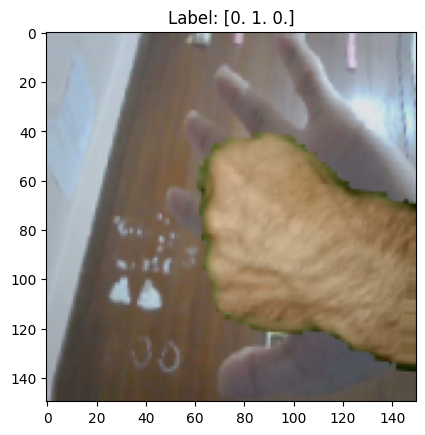

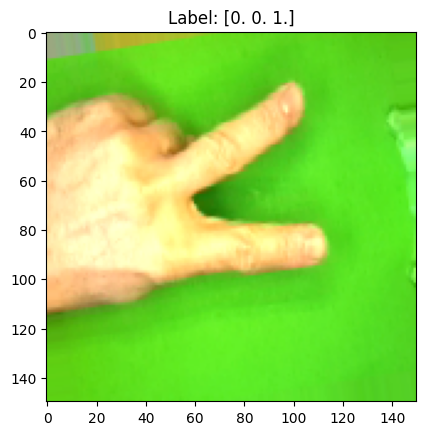

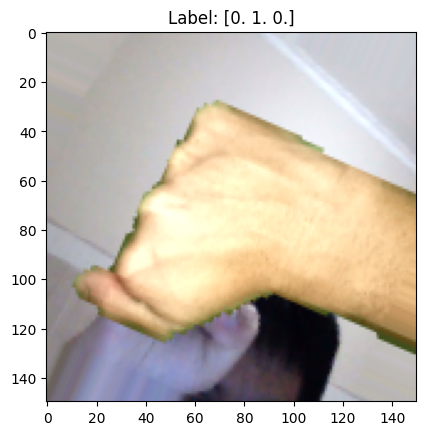

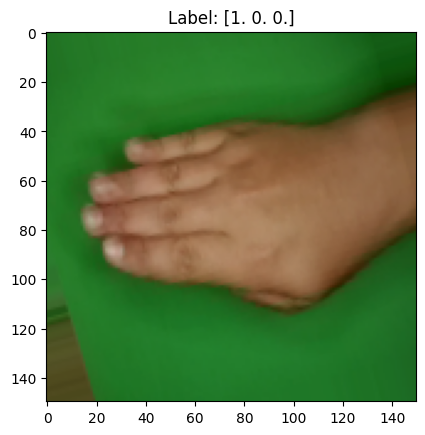

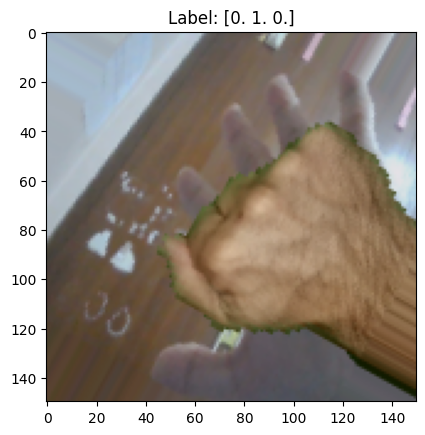

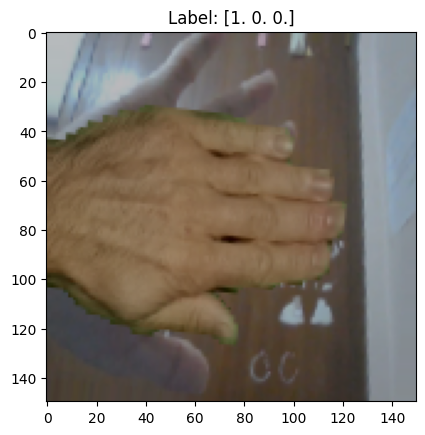

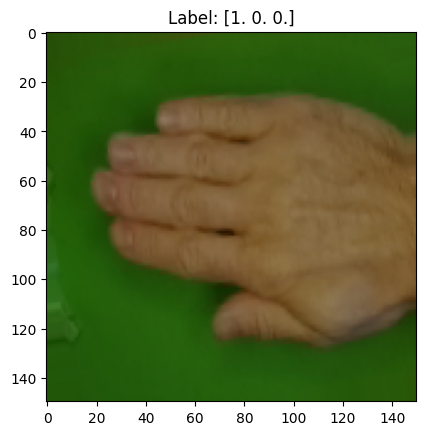

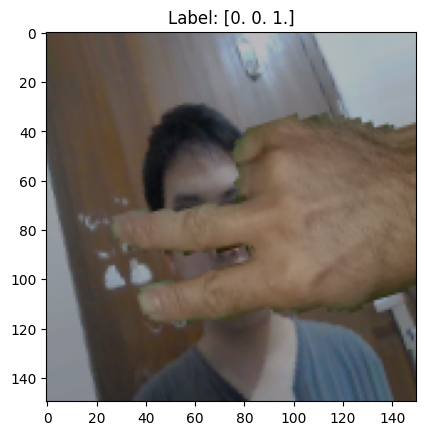

In [11]:
import matplotlib.pyplot as plt

# Mendapatkan 2 batch pertama dari generator
for i in range(2):
    batch_data = next(train_generator)  # Mengambil satu batch dari generator
    images, labels = batch_data  # Memisahkan gambar dan label dari batch

    # Menampilkan lima gambar dari setiap batch
    for j in range(4):  # Untuk batch_size=4
        image = images[j]  # Mengambil gambar
        label = labels[j]  # Mengambil label
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Activation
from tensorflow.keras.models import Model

nasnetMobile = tf.keras.applications.NASNetMobile(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
nasnetMobile.trainable = False

x = nasnetMobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(712, activation='relu')(x)
x = Dropout(0.40)(x)
preds = Dense(3,activation='softmax')(x)
model = Model(inputs=nasnetMobile.input, outputs=preds)

19993432/19993432 [==============================] - 9s 0us/step


In [13]:
import tensorflow as tf

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.0001,rho=0.999,epsilon=1e-08),
              metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=2, mode='min',min_delta=0.001, verbose=1)

history = model.fit(
      train_generator,
      epochs=12,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_data=validation_generator,
      verbose=1,
      callbacks=[early_stopping])

Epoch 1/12
41/41 [==============================] - 54s 1s/step - loss: 0.7828 - accuracy: 0.7346 - val_loss: 0.2493 - val_accuracy: 0.9336
Epoch 2/12
41/41 [==============================] - 30s 725ms/step - loss: 0.3094 - accuracy: 0.8954 - val_loss: 0.2297 - val_accuracy: 0.9199
Epoch 3/12
41/41 [==============================] - 30s 726ms/step - loss: 0.2908 - accuracy: 0.8962 - val_loss: 0.1869 - val_accuracy: 0.9474
Epoch 4/12
41/41 [==============================] - 30s 731ms/step - loss: 0.2407 - accuracy: 0.9087 - val_loss: 0.1671 - val_accuracy: 0.9474
Epoch 5/12
41/41 [==============================] - 31s 753ms/step - loss: 0.2401 - accuracy: 0.9141 - val_loss: 0.1360 - val_accuracy: 0.9600
Epoch 6/12
41/41 [==============================] - 30s 746ms/step - loss: 0.2091 - accuracy: 0.9360 - val_loss: 0.1264 - val_accuracy: 0.9622
Epoch 7/12
41/41 [==============================] - 31s 756ms/step - loss: 0.1925 - accuracy: 0.9368 - val_loss: 0.1390 - val_accuracy: 0.9554
Ep

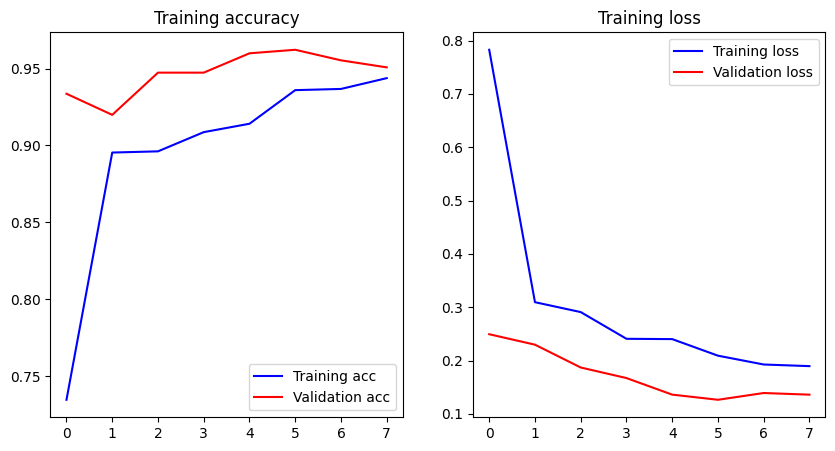

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(epochs, acc, 'b', label='Training acc')
axs[0].plot(epochs, val_acc, 'r', label='Validation acc')
axs[0].set_title('Training accuracy')
axs[0].legend()

axs[1].plot(epochs, loss, 'b', label='Training loss')
axs[1].plot(epochs, val_loss, 'r', label='Validation loss')
axs[1].set_title('Training loss')
axs[1].legend()

plt.show()

In [16]:
nasnetMobile.trainable = True

fine_tune_at = len(nasnetMobile.layers)*0.3506

for layer in nasnetMobile.layers[:int(fine_tune_at)]:
  layer.trainable = False

In [18]:
import tensorflow as tf

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.00001,rho=0.999,epsilon=1e-08),
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2,min_delta=0.0001, mode='min', verbose=1)

history_fine_tuning = model.fit(
      train_generator,
      epochs=20,
      initial_epoch = history.epoch[-1],
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_data=validation_generator,
      verbose=1,
      callbacks=[early_stopping])

Epoch 8/20
41/41 [==============================] - 90s 2s/step - loss: 0.2704 - accuracy: 0.9032 - val_loss: 0.0729 - val_accuracy: 0.9760
Epoch 9/20
41/41 [==============================] - 59s 1s/step - loss: 0.0836 - accuracy: 0.9750 - val_loss: 0.0374 - val_accuracy: 0.9874
Epoch 10/20
41/41 [==============================] - 58s 1s/step - loss: 0.0760 - accuracy: 0.9735 - val_loss: 0.0332 - val_accuracy: 0.9897
Epoch 11/20
41/41 [==============================] - 59s 1s/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0307 - val_accuracy: 0.9920
Epoch 12/20
41/41 [==============================] - 59s 1s/step - loss: 0.0577 - accuracy: 0.9797 - val_loss: 0.0317 - val_accuracy: 0.9886
Epoch 13/20
41/41 [==============================] - 59s 1s/step - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0300 - val_accuracy: 0.9886
Epoch 14/20
41/41 [==============================] - 59s 1s/step - loss: 0.0369 - accuracy: 0.9875 - val_loss: 0.0266 - val_accuracy: 0.9920
Epoch 15/20
41/

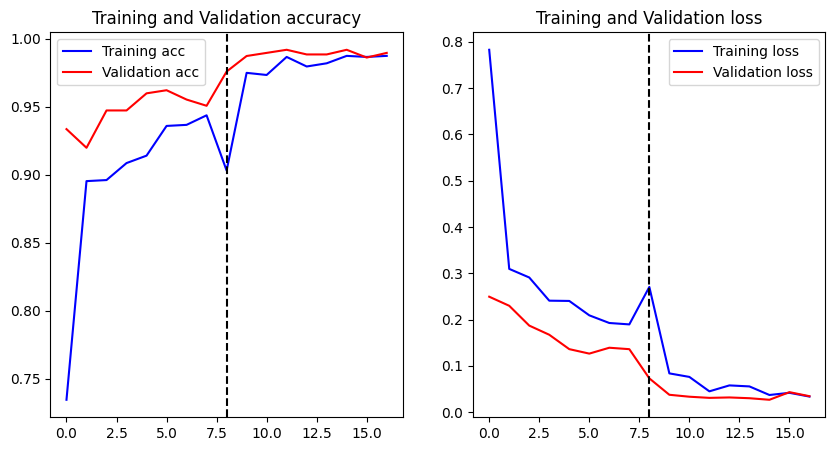

In [20]:
import matplotlib.pyplot as plt

# Ambil data dari history pertama (model fit pertama)
acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

# Ambil data dari history fine tuning (model fit kedua)
acc_fine_tuning = history_fine_tuning.history['accuracy']
val_acc_fine_tuning = history_fine_tuning.history['val_accuracy']
loss_fine_tuning = history_fine_tuning.history['loss']
val_loss_fine_tuning = history_fine_tuning.history['val_loss']

# Gabungkan data accuracy dan loss dari kedua riwayat pelatihan
acc_combined = acc_history + acc_fine_tuning
val_acc_combined = val_acc_history + val_acc_fine_tuning
loss_combined = loss_history + loss_fine_tuning
val_loss_combined = val_loss_history + val_loss_fine_tuning

epochs = range(len(acc_combined))

# Plot grafik
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot grafik akurasi
axs[0].plot(epochs, acc_combined, 'b', label='Training acc')
axs[0].plot(epochs, val_acc_combined, 'r', label='Validation acc')
axs[0].set_title('Training and Validation accuracy')
axs[0].legend()

# Plot grafik loss
axs[1].plot(epochs, loss_combined, 'b', label='Training loss')
axs[1].plot(epochs, val_loss_combined, 'r', label='Validation loss')
axs[1].set_title('Training and Validation loss')
axs[1].legend()

# Tambahkan garis lurus di tengah untuk menandakan transisi antara dua pelatihan
axs[0].axvline(x=len(acc_history), color='k', linestyle='--')
axs[1].axvline(x=len(loss_history), color='k', linestyle='--')

plt.show()


In [21]:
model.save("bestModelRPS.h5")

In [2]:
from tensorflow.keras.models import load_model

loaded_model = load_model("bestModelRPS.h5")

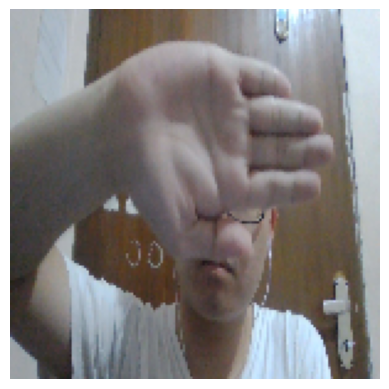

1/1 [==============================] - 0s 39ms/step
File: WIN_20240312_21_05_27_Pro.jpg
Predicted class: paper


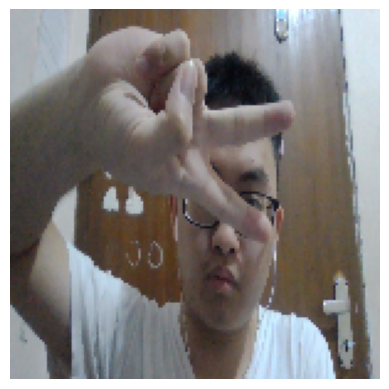

1/1 [==============================] - 0s 42ms/step
File: WIN_20240312_21_05_33_Pro.jpg
Predicted class: scissors


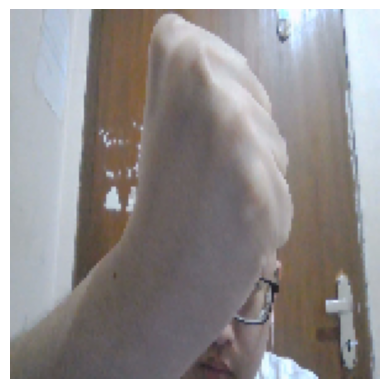

1/1 [==============================] - 0s 38ms/step
File: WIN_20240312_21_08_51_Pro.jpg
Predicted class: rock


In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

class_names = ['paper', 'rock', 'scissors']

# Direktori tempat gambar-gambar berada
directory = 'new_image'

# Mendapatkan daftar nama file dalam direktori
file_names = os.listdir(directory)

# Loop melalui setiap file
for file_name in file_names:
    # Mendapatkan path lengkap ke setiap file
    file_path = os.path.join(directory, file_name)
    
    # Meload gambar
    img = image.load_img(file_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Praproses gambar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    # Melakukan prediksi kelas
    classes = loaded_model.predict(x)
    prediction = np.argmax(classes, axis=1)[0]

    print('File:', file_name)
    print('Predicted class:', class_names[prediction])
